In [9]:
import os
import pandas as pd
import kagglehub

# Download dataset and get path
path = kagglehub.dataset_download("datamunge/sign-language-mnist")

# Load the training data CSV directly
df = pd.read_csv(os.path.join(path, "sign_mnist_train.csv"))
print(df.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [10]:
print("Number of Samples:",df.shape[0])
print("Number of features:",df.shape[1])
print("Statistics:")
df.describe()

Number of Samples: 27455
Number of features: 785
Statistics:


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


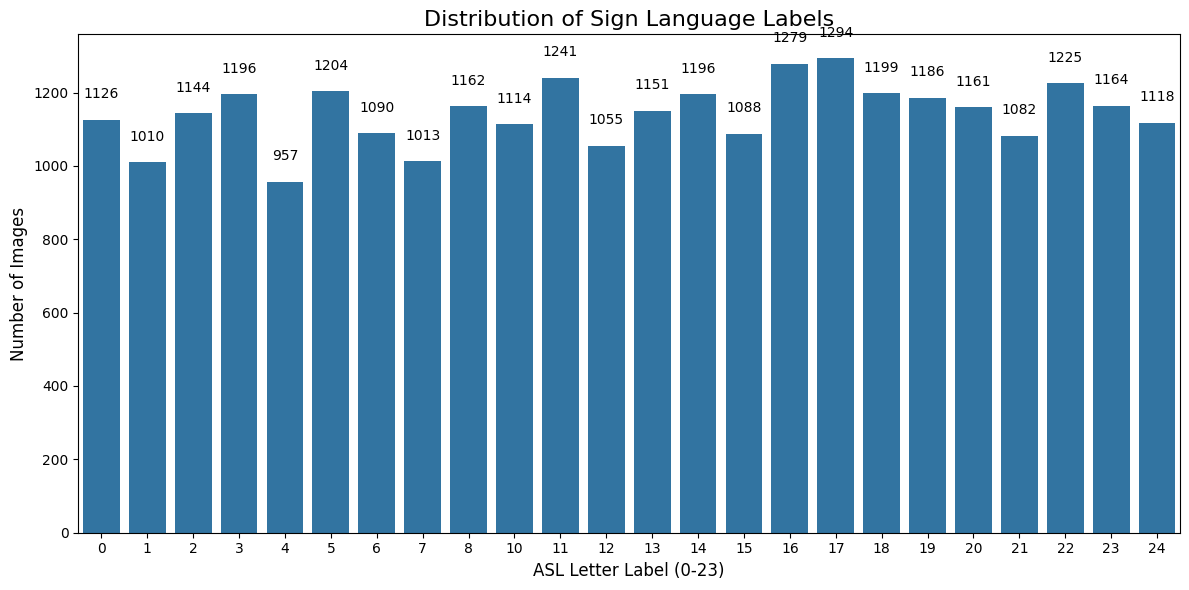

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
label_counts = df['label'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)

plt.title("Distribution of Sign Language Labels", fontsize=16)
plt.xlabel("ASL Letter Label (0-23)", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.xticks(rotation=0)

for i, count in enumerate(label_counts.values):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

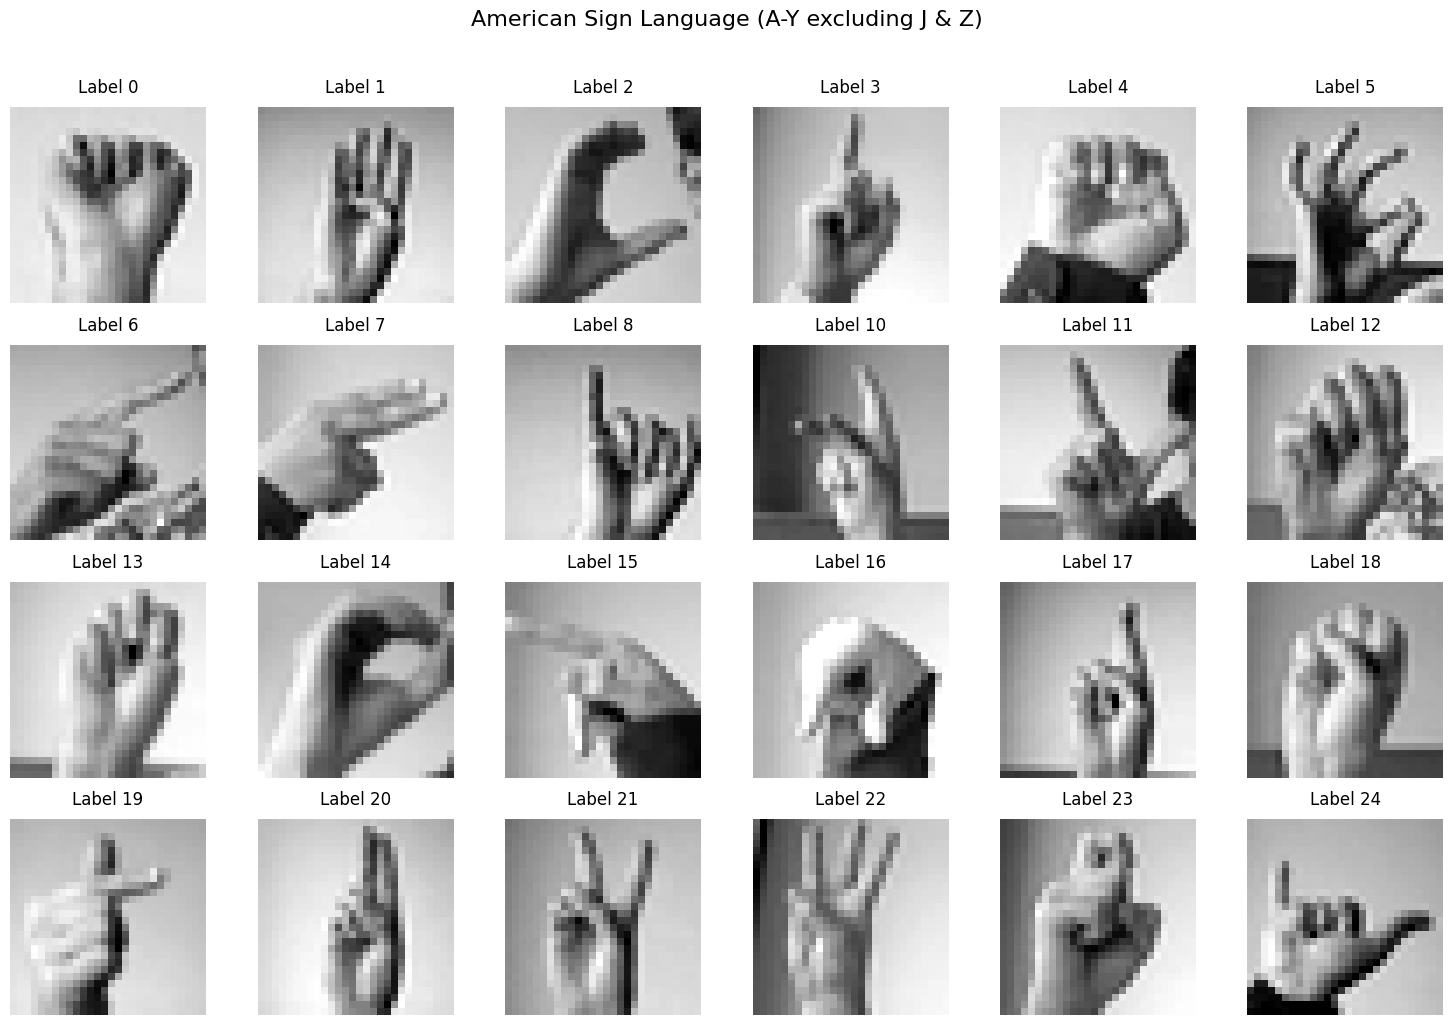

In [15]:
plt.figure(figsize=(15, 10))
unique_labels = sorted(df['label'].unique())
    
for i, label in enumerate(unique_labels):
    sample = df[df['label'] == label].iloc[0]
    pixels = sample.drop('label').values.reshape(28, 28)
        
    plt.subplot(4, 6, i+1) 
    plt.imshow(pixels, cmap='gray')
    plt.title(f'Label {label}', pad=10)
    plt.axis('off')
    
plt.suptitle('American Sign Language (A-Y excluding J & Z)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [18]:
import numpy as np
labels = df['label'].values
pixels = df.drop(columns=['label']).values

# Normalize to [0, 1] and reshape to (N, 1, 28, 28)
normalized_pixels = pixels / 255.0
images = normalized_pixels.reshape(-1, 1, 28, 28)  # Add channel dimension

print("Processed images shape:", images.shape)
print("Min/Max pixel values:", np.min(images), np.max(images))

Processed images shape: (27455, 1, 28, 28)
Min/Max pixel values: 0.0 1.0


In [21]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
X = torch.FloatTensor(images)  # (27455, 1, 28, 28)
y = torch.LongTensor(labels)    # (27455,)

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: torch.Size([21964, 1, 28, 28]), Test: torch.Size([5491, 1, 28, 28])


In [22]:
from torchvision import transforms

# Define augmentations
augment = transforms.Compose([
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),
    transforms.RandomErasing(p=0.1, scale=(0.02, 0.1))
])

# Apply to training set only
augmented_train = []
for img in X_train:
    augmented_train.append(augment(img))
X_train_aug = torch.stack(augmented_train)

print("Augmented train set:", X_train_aug.shape)

Augmented train set: torch.Size([21964, 1, 28, 28])


In [23]:
# Combine images and labels
train_dataset = TensorDataset(X_train_aug, y_train)  # or X_train if no augmentation
test_dataset = TensorDataset(X_test, y_test)

# Initialize loaders
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Verify one batch
batch_x, batch_y = next(iter(train_loader))
print("\nSample batch:")
print("Images:", batch_x.shape, "| Labels:", batch_y.shape)


Sample batch:
Images: torch.Size([64, 1, 28, 28]) | Labels: torch.Size([64])


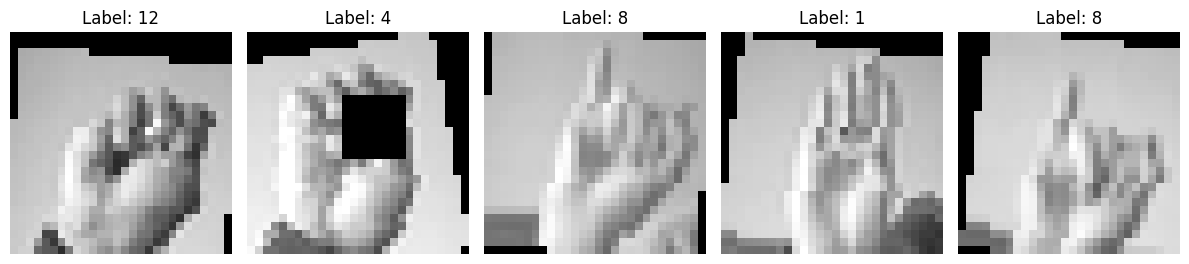

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(batch_x[i].squeeze(), cmap='gray')
    plt.title(f"Label: {batch_y[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from einops import rearrange  # pip install einops

class HybridAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        # CNN Encoder
        self.encoder_cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1),  # 28x28 → 14x14
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1), # 14x14 → 7x7
        )
        
        # Transformer Encoder
        self.encoder_transformer = nn.TransformerEncoderLayer(
            d_model=64, nhead=4, dim_feedforward=128
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        # Encode
        x = self.encoder_cnn(x)  # [B, 64, 7, 7]
        x = rearrange(x, 'b c h w -> b (h w) c')  # [B, 49, 64]
        x = self.encoder_transformer(x)  # [B, 49, 64]
        x = rearrange(x, 'b (h w) c -> b c h w', h=7)  # [B, 64, 7, 7]
        
        # Decode
        return self.decoder(x)

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HybridAutoencoder().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Verify model
dummy_input = torch.randn(1, 1, 28, 28).to(device)
print("Output shape:", model(dummy_input).shape)  # Should be [1, 1, 28, 28]


Output shape: torch.Size([1, 1, 28, 28])


Epoch 01 | Loss: 0.007342
Epoch 02 | Loss: 0.000817
Epoch 03 | Loss: 0.000486
Epoch 04 | Loss: 0.000350
Epoch 05 | Loss: 0.000281


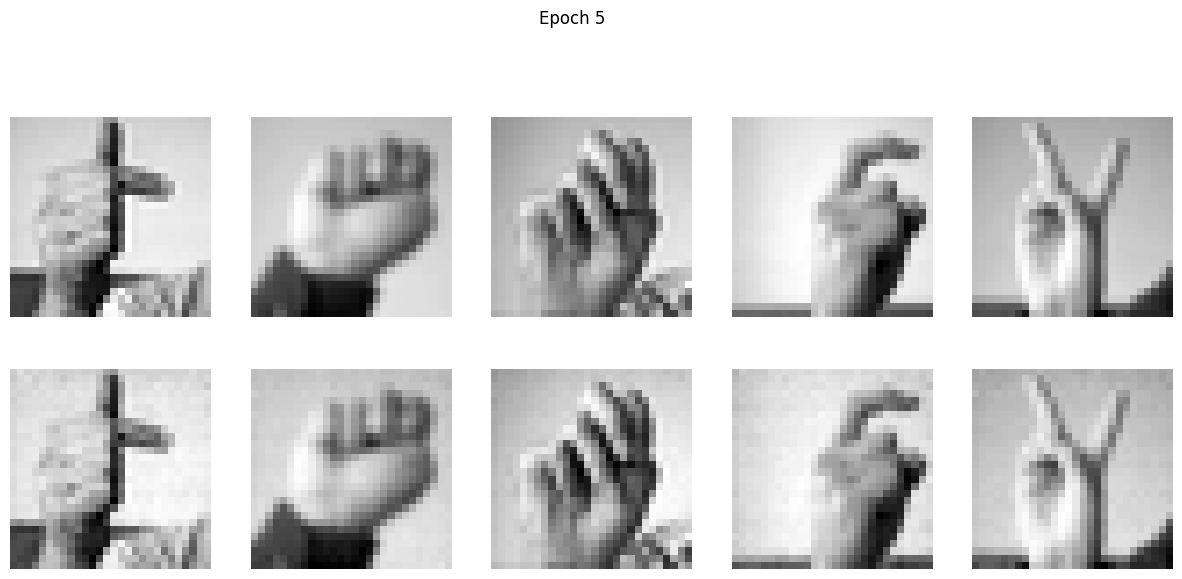

Epoch 06 | Loss: 0.000237
Epoch 07 | Loss: 0.000209
Epoch 08 | Loss: 0.000183
Epoch 09 | Loss: 0.000167
Epoch 10 | Loss: 0.000156


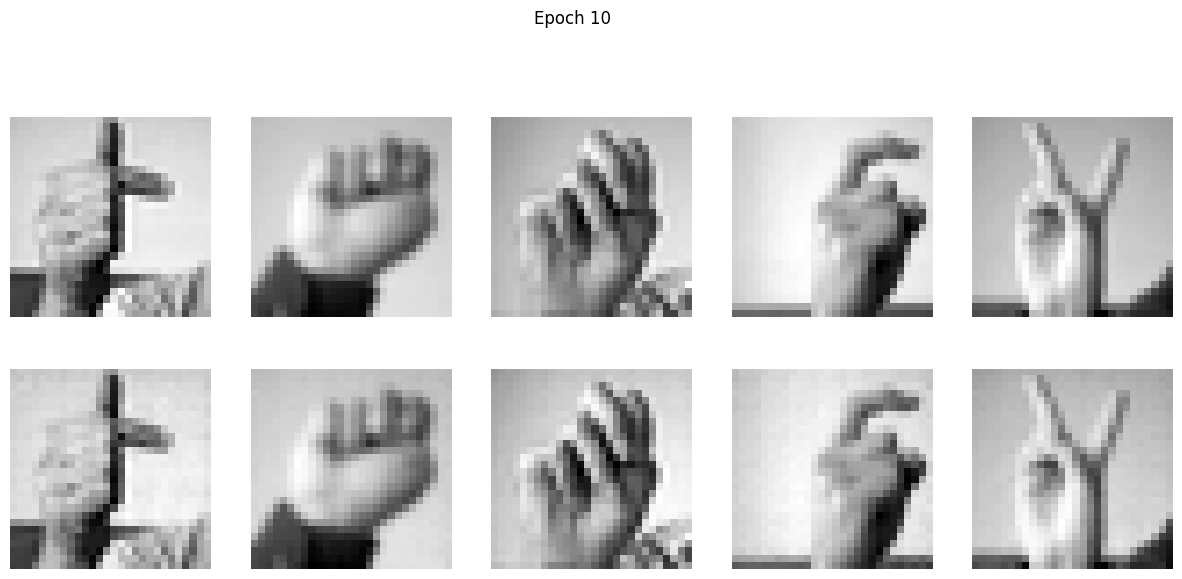

Epoch 11 | Loss: 0.000147
Epoch 12 | Loss: 0.000137
Epoch 13 | Loss: 0.000123
Epoch 14 | Loss: 0.000123
Epoch 15 | Loss: 0.000117


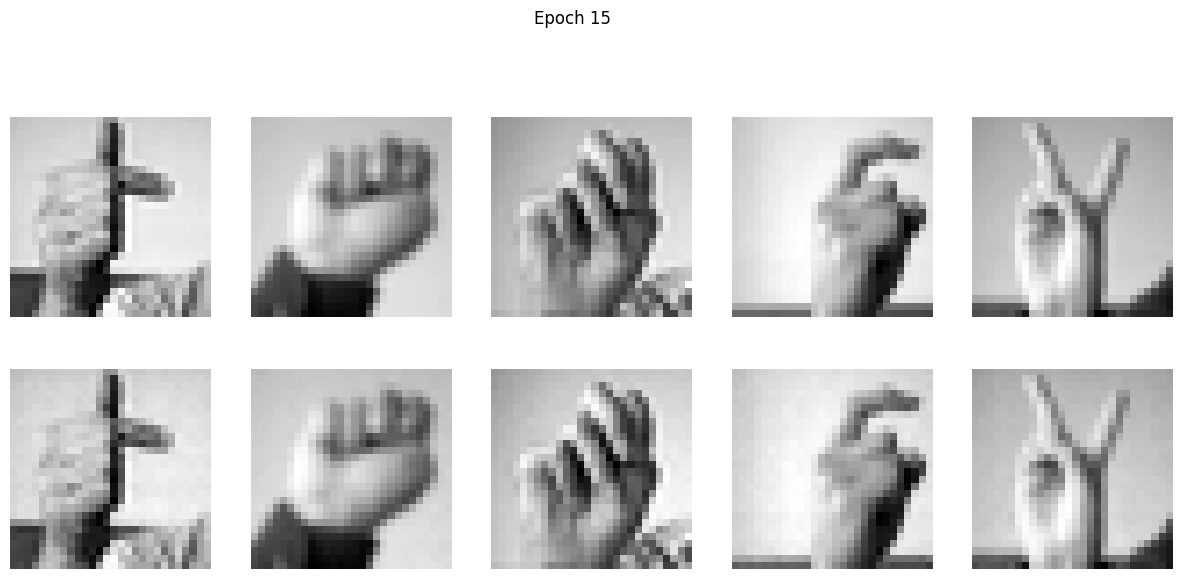

Epoch 16 | Loss: 0.000109
Epoch 17 | Loss: 0.000103
Epoch 18 | Loss: 0.000103
Epoch 19 | Loss: 0.000096
Epoch 20 | Loss: 0.000087


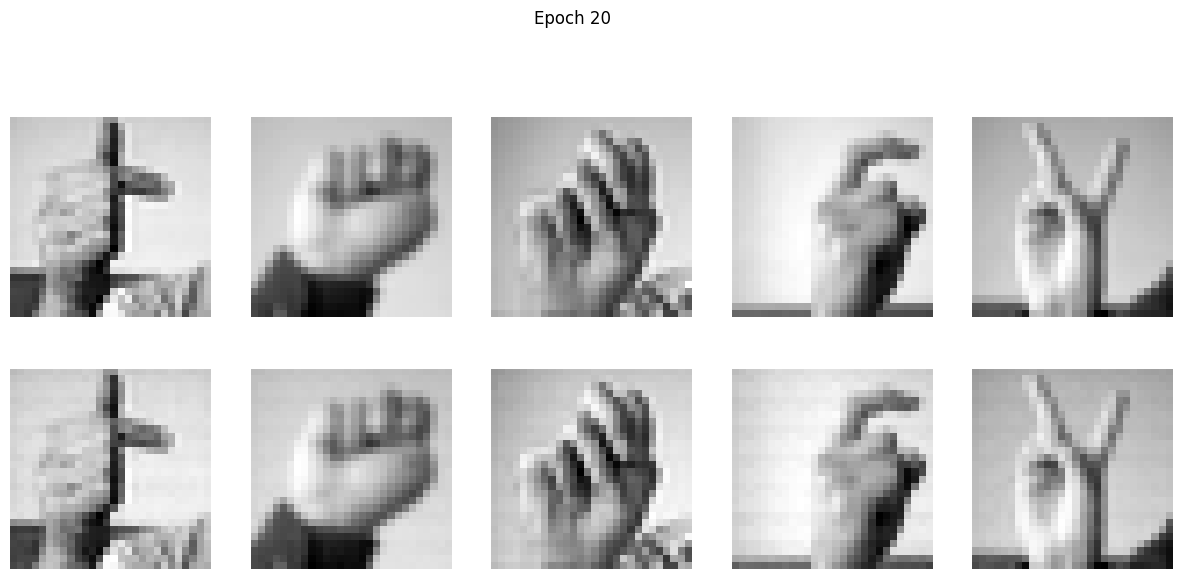

In [29]:
def train_epoch(model, dataloader):
    model.train()
    train_loss = 0
    for batch_x, _ in dataloader:  # Ignore labels for autoencoder
        batch_x = batch_x.to(device)
        
        optimizer.zero_grad()
        reconstructions = model(batch_x)
        loss = criterion(reconstructions, batch_x)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    return train_loss / len(dataloader)

# Training for 20 epochs
for epoch in range(1, 21):
    loss = train_epoch(model, train_loader)
    print(f"Epoch {epoch:02d} | Loss: {loss:.6f}")
    
    # Visualize progress every 5 epochs
    if epoch % 5 == 0:
        with torch.no_grad():
            test_sample, _ = next(iter(test_loader))
            test_sample = test_sample[:5].to(device)
            reconstructions = model(test_sample)
            
            # Plot comparison
            fig, axes = plt.subplots(2, 5, figsize=(15, 6))
            for i in range(5):
                axes[0,i].imshow(test_sample[i].cpu().squeeze(), cmap='gray')
                axes[1,i].imshow(reconstructions[i].cpu().squeeze(), cmap='gray')
                axes[0,i].axis('off'); axes[1,i].axis('off')
            axes[0,0].set_ylabel("Original"); axes[1,0].set_ylabel("Reconstructed")
            plt.suptitle(f"Epoch {epoch}", y=1.05)
            plt.show()

In [30]:
model.eval()
test_loss = 0
with torch.no_grad():
    for batch_x, _ in test_loader:
        batch_x = batch_x.to(device)
        reconstructions = model(batch_x)
        test_loss += criterion(reconstructions, batch_x).item()
print(f"Test MSE: {test_loss/len(test_loader):.6f}")

Test MSE: 0.000144


In [31]:
from sklearn.manifold import TSNE

def extract_latent(model, dataloader):
    latents, labels = [], []
    with torch.no_grad():
        for batch_x, batch_y in dataloader:
            batch_x = batch_x.to(device)
            latent = model.encoder_cnn(batch_x)  # [B, 64, 7, 7]
            latent = latent.mean(dim=[2,3])      # Global average pooling → [B, 64]
            latents.append(latent.cpu())
            labels.append(batch_y)
    return torch.cat(latents), torch.cat(labels)

latent_vectors, true_labels = extract_latent(model, test_loader)

tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(latent_vectors)

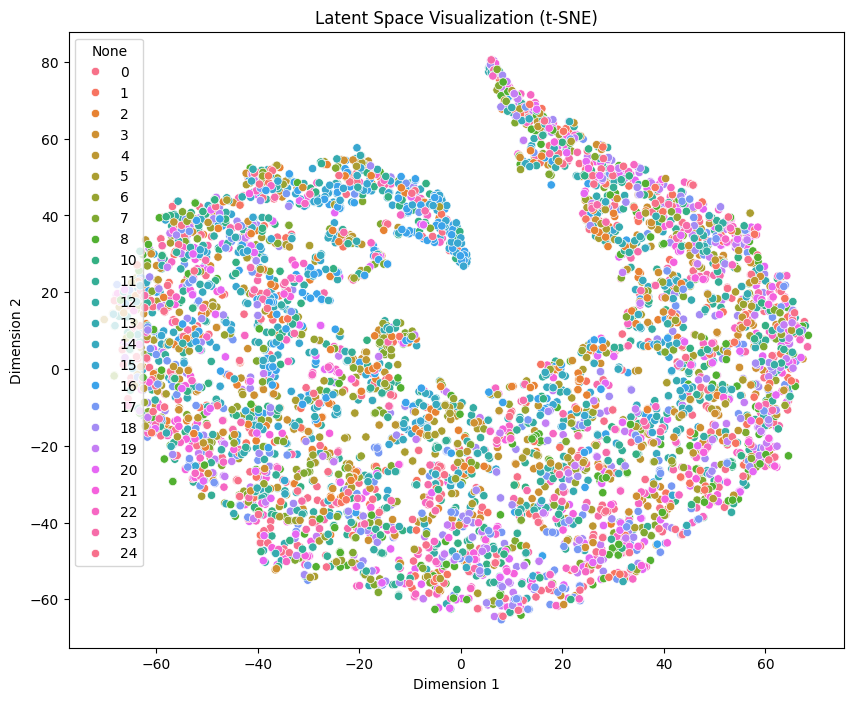

In [33]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=latent_2d[:,0], y=latent_2d[:,1], 
                hue=true_labels, palette="husl", legend="full")
plt.title("Latent Space Visualization (t-SNE)")
plt.xlabel("Dimension 1"); plt.ylabel("Dimension 2")
plt.show()